In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import seaborn as sns
import sklearn as sk
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [32]:
#import data
coupon_data = pd.read_csv('in-vehicle-coupon-recommendation.csv')

In [33]:
#data attributes and their types
coupon_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [34]:
#first few tuples in the dataset
coupon_data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [35]:
#data description
coupon_data.describe(include='all')

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684,12684,12684,12684.000000,12684,12684,12684,12684,12684,12684,...,12467,12533,12554,12495,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
unique,3,4,3,NaN,5,5,2,2,8,5,...,5,5,5,5,NaN,NaN,NaN,NaN,NaN,NaN
top,No Urgent Place,Alone,Sunny,NaN,6PM,Coffee House,1d,Female,21,Married partner,...,less1,1~3,1~3,less1,NaN,NaN,NaN,NaN,NaN,NaN
freq,6283,7305,10069,NaN,3230,3996,7091,6511,2653,5100,...,3385,4672,5376,6077,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,63.301798,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,NaN,NaN,NaN,19.154486,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,NaN,NaN,NaN,30.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,NaN,NaN,NaN,80.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,NaN,NaN,NaN,80.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,1.000000,0.000000,0.000000,1.000000,1.000000


In [36]:
#change the temperature attribute to the 'category' type
coupon_data['temperature']=coupon_data['temperature'].astype('category')

In [37]:
#checking the types and counts of the cars attribute
coupon_data["car"].value_counts()

do not drive                                22
Scooter and motorcycle                      22
Mazda5                                      22
Car that is too old to install Onstar :D    21
crossover                                   21
Name: car, dtype: int64

In [38]:
#dropping the car column
coupon_data.drop('car', inplace=True, axis=1)

In [39]:
#fill missing values with the most common value
for x in coupon_data.columns[coupon_data.isna().any()]:
    coupon_data = coupon_data.fillna({x: coupon_data[x].value_counts().idxmax()})

In [40]:
#changing object datatypes to categorical datatypes
coupon_data_obj = coupon_data.select_dtypes(include=['object']).copy()

for col in coupon_data_obj.columns:
    coupon_data[col]=coupon_data[col].astype('category')

In [41]:
#counting unique values in the columns with numeric values
coupon_data.select_dtypes('int64').nunique()

has_children         2
toCoupon_GEQ5min     1
toCoupon_GEQ15min    2
toCoupon_GEQ25min    2
direction_same       2
direction_opp        2
Y                    2
dtype: int64

In [42]:
#dropping the toCoupon_GEQ5min column as it only has 1 value
coupon_data.drop(columns=['toCoupon_GEQ5min'], inplace=True)

In [43]:
#data attributes and their types
coupon_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   destination           12684 non-null  category
 1   passanger             12684 non-null  category
 2   weather               12684 non-null  category
 3   temperature           12684 non-null  category
 4   time                  12684 non-null  category
 5   coupon                12684 non-null  category
 6   expiration            12684 non-null  category
 7   gender                12684 non-null  category
 8   age                   12684 non-null  category
 9   maritalStatus         12684 non-null  category
 10  has_children          12684 non-null  int64   
 11  education             12684 non-null  category
 12  occupation            12684 non-null  category
 13  income                12684 non-null  category
 14  Bar                   12684 non-null  category
 15  Co

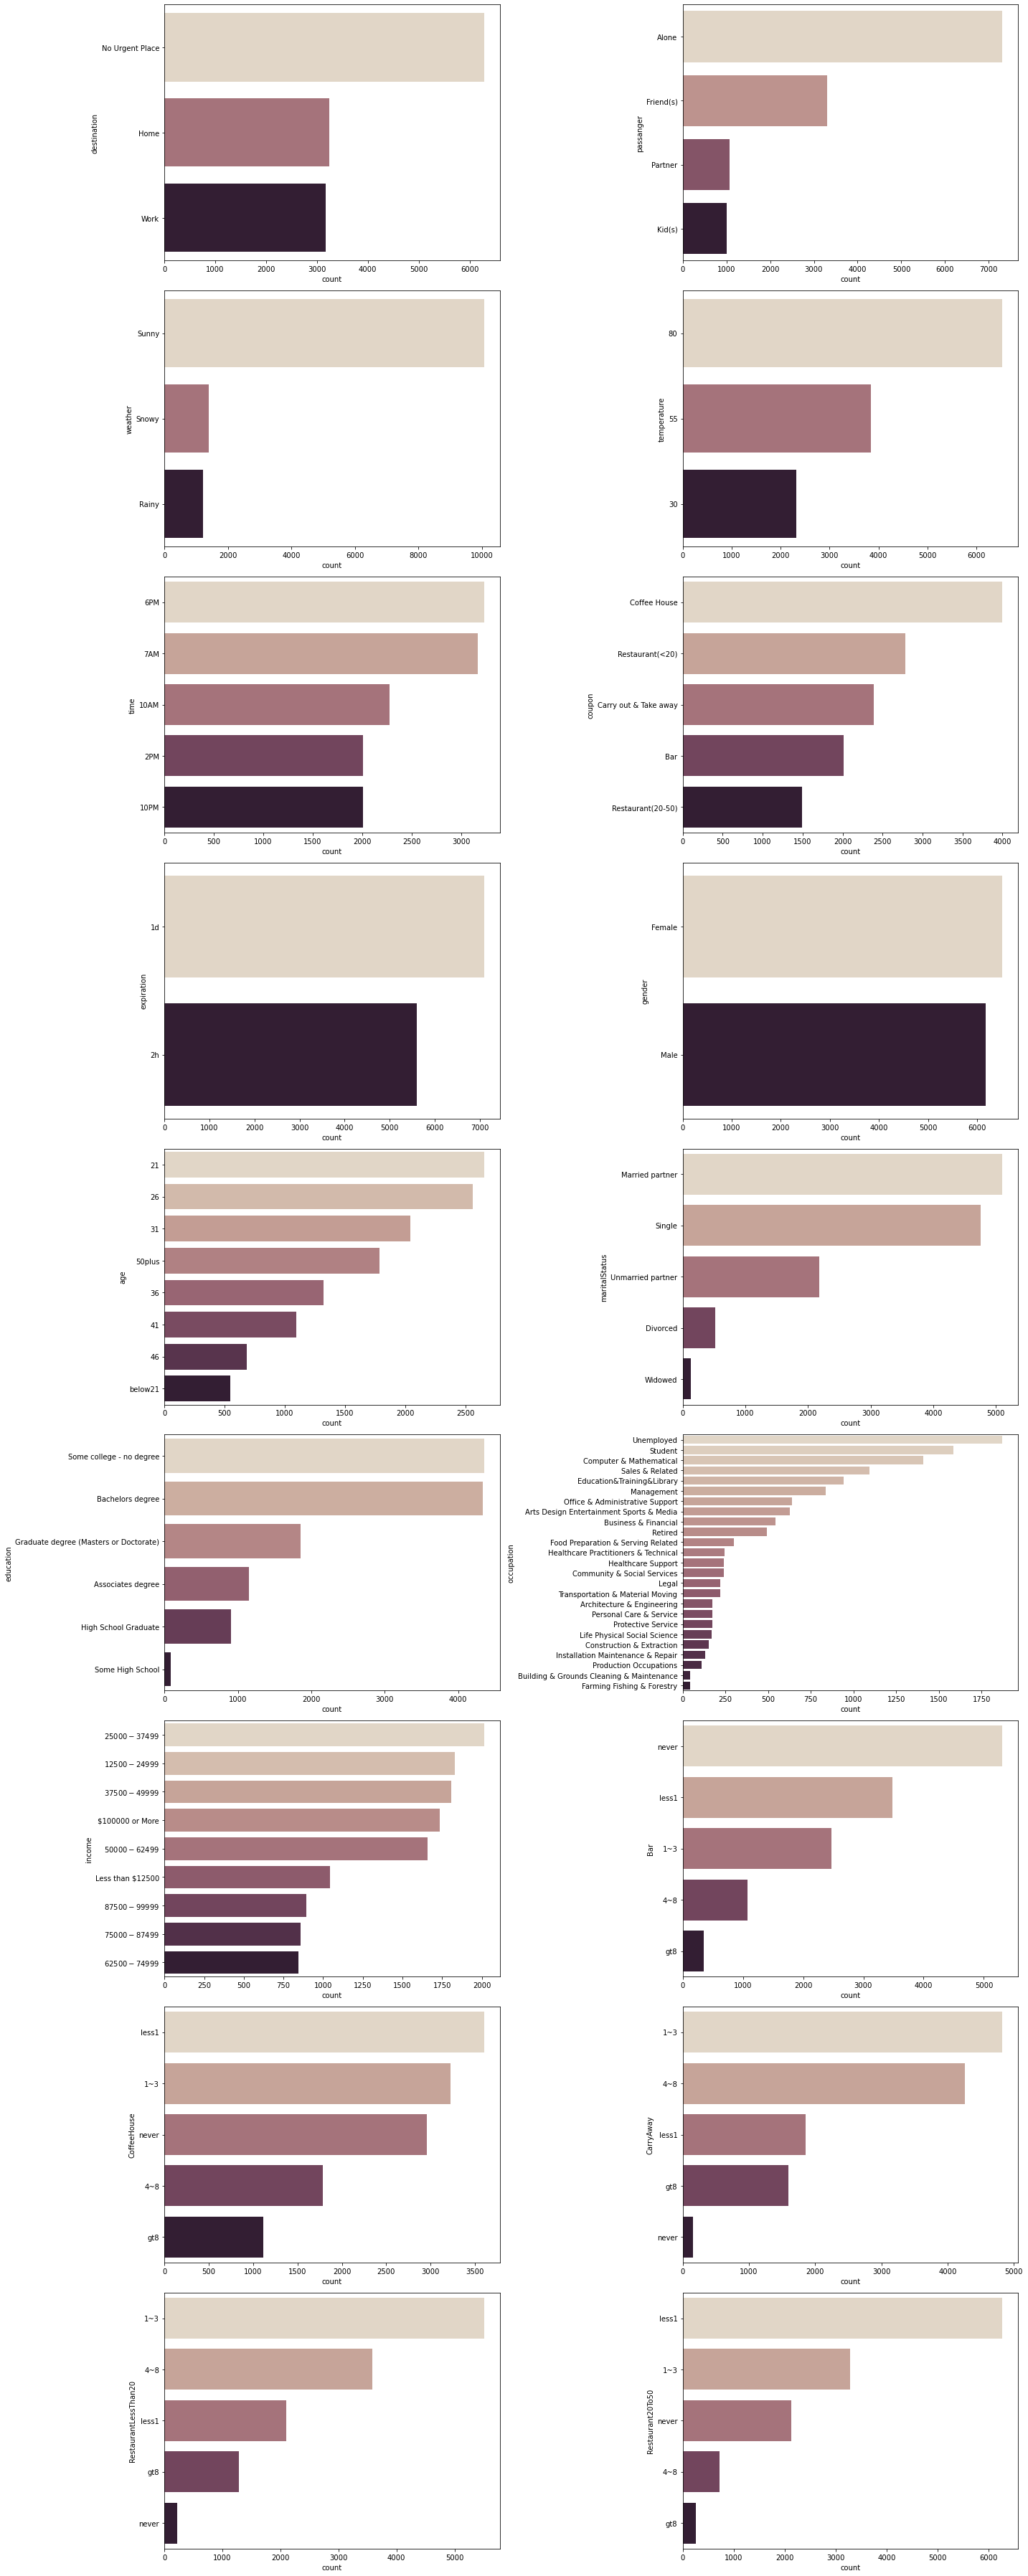

In [24]:
#plotting bar charts for all categorical attributes
fig, axes = plt.subplots(9, 2, figsize=(20,50))
axes = axes.flatten()

for ax, col in zip(axes, coupon_data.select_dtypes('category').columns):
    sns.countplot(y=col, data=coupon_data, ax=ax, 
                  palette="ch:.25", order=coupon_data[col].value_counts().index);

plt.tight_layout()
plt.show()

In [44]:
#Transforming the data using LabelEnconder and OneHotEncoder  
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

enc = OneHotEncoder(dtype='int64')

coupon_data_cat = coupon_data.select_dtypes(include=['category']).copy()
coupon_data_int = coupon_data.select_dtypes(include=['int64']).copy()

coupon_data_enc = pd.DataFrame()
for col in coupon_data_cat.columns:
    enc_results = enc.fit_transform(coupon_data_cat[[col]])
    coupon_data0 = pd.DataFrame(enc_results.toarray(), columns=enc.categories_)
    coupon_data_enc = pd.concat([coupon_data_enc,coupon_data0], axis=1)
    
coupon_data_final = pd.concat([coupon_data_enc, coupon_data_int], axis=1)

In [45]:
coupon_data_final

,"(Home,)","(No Urgent Place,)","(Work,)","(Alone,)","(Friend(s),)","(Kid(s),)","(Partner,)","(Rainy,)","(Snowy,)","(Sunny,)",...,"(4~8,)","(gt8,)","(less1,)","(never,)",has_children,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,0,1,0,1,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,1
1,0,1,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
2,0,1,0,0,1,0,0,0,0,1,...,0,0,0,0,1,1,0,0,1,1
3,0,1,0,0,1,0,0,0,0,1,...,0,0,0,0,1,1,0,0,1,0
4,0,1,0,0,1,0,0,0,0,1,...,0,0,0,0,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,1,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,1
12680,0,0,1,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,1
12681,0,0,1,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
12682,0,0,1,1,0,0,0,0,1,0,...,0,0,0,0,0,1,1,0,1,0


In [47]:
#Splitting the data into test and training
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(coupon_data_final, test_size=.2, random_state=42, shuffle=True, stratify=coupon_data_final['Y'])

In [48]:
#Creating the dependent and indepdent variables
X_train = train_set.iloc[:, :-1].values
X_test = test_set.iloc[:, :-1].values

y_train = train_set.iloc[:, -1].values
y_test = test_set.iloc[:, -1].values

In [49]:
#Applying Logistic Regression
LR = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr').fit(X_train, y_train)

y_pred_LR = LR.predict(X_test)

print(classification_report(y_test, y_pred_LR))

#Logistic Regression Confusion Matrix
cm_LR = confusion_matrix(y_test,y_pred_LR)
pd.crosstab(y_test, y_pred_LR, rownames = ['Truth'], colnames =['Predicted'], margins = True)

              precision    recall  f1-score   support

           0       0.65      0.56      0.60      1095
           1       0.70      0.77      0.73      1442

    accuracy                           0.68      2537
   macro avg       0.68      0.67      0.67      2537
weighted avg       0.68      0.68      0.68      2537



Predicted,0,1,All
Truth,,,
0,615,480,1095
1,327,1115,1442
All,942,1595,2537


In [50]:
#Applying Decision Tree
DTC = DecisionTreeClassifier().fit(X_train, y_train)

y_pred_DTC = DTC.predict(X_test)

print(classification_report(y_test, y_pred_DTC))

#Decision Tree Confusion Matrix
cm_DTC = confusion_matrix(y_test,y_pred_DTC)
pd.crosstab(y_test, y_pred_DTC, rownames = ['Truth'], colnames =['Predicted'], margins = True)

              precision    recall  f1-score   support

           0       0.63      0.63      0.63      1095
           1       0.72      0.71      0.72      1442

    accuracy                           0.68      2537
   macro avg       0.67      0.67      0.67      2537
weighted avg       0.68      0.68      0.68      2537



Predicted,0,1,All
Truth,,,
0,690,405,1095
1,412,1030,1442
All,1102,1435,2537


In [51]:
#Applying Decision Tree Ensemble Bagging
BC = BaggingClassifier().fit(X_train, y_train)

y_pred_BC = BC.predict(X_test)

print(classification_report(y_test, y_pred_BC))

#Decision Tree Ensemble Bagging Confusion Matrix
cm_BC = confusion_matrix(y_test,y_pred_BC)
pd.crosstab(y_test, y_pred_BC, rownames = ['Truth'], colnames =['Predicted'], margins = True)

              precision    recall  f1-score   support

           0       0.70      0.68      0.69      1095
           1       0.76      0.77      0.77      1442

    accuracy                           0.73      2537
   macro avg       0.73      0.73      0.73      2537
weighted avg       0.73      0.73      0.73      2537



Predicted,0,1,All
Truth,,,
0,746,349,1095
1,326,1116,1442
All,1072,1465,2537


In [52]:
#Applying Decision Tree Ensemble Boosting
GBC = GradientBoostingClassifier().fit(X_train, y_train)

y_pred_GBC = GBC.predict(X_test)

print(classification_report(y_test, y_pred_GBC))

#Decision Tree Ensemble Gradient Boosting Confusion Matrix
cm_GBC = confusion_matrix(y_test,y_pred_GBC)
pd.crosstab(y_test, y_pred_GBC, rownames = ['Truth'], colnames =['Predicted'], margins = True)

              precision    recall  f1-score   support

           0       0.73      0.60      0.65      1095
           1       0.73      0.83      0.78      1442

    accuracy                           0.73      2537
   macro avg       0.73      0.71      0.71      2537
weighted avg       0.73      0.73      0.72      2537



Predicted,0,1,All
Truth,,,
0,652,443,1095
1,247,1195,1442
All,899,1638,2537


In [53]:
#Applying K Nearest Neighbors
KNN = KNeighborsClassifier().fit(X_train, y_train)

y_pred_KNN = KNN.predict(X_test)

print(classification_report(y_test, y_pred_KNN))

#K Nearest Neighbors Confusion Matrix
cm_LR = confusion_matrix(y_test,y_pred_KNN)
pd.crosstab(y_test, y_pred_KNN, rownames = ['Truth'], colnames =['Predicted'], margins = True)

              precision    recall  f1-score   support

           0       0.61      0.54      0.57      1095
           1       0.68      0.74      0.71      1442

    accuracy                           0.65      2537
   macro avg       0.64      0.64      0.64      2537
weighted avg       0.65      0.65      0.65      2537



Predicted,0,1,All
Truth,,,
0,587,508,1095
1,373,1069,1442
All,960,1577,2537


In [54]:
#Applying Linear Discriminant Analysis
LDA = LinearDiscriminantAnalysis().fit(X_train, y_train)

y_pred_LDA = LDA.predict(X_test)

print(classification_report(y_test, y_pred_LDA))

#Linear Discriminant Analysis Confusion Matrix
cm_LDA = confusion_matrix(y_test,y_pred_LDA)
pd.crosstab(y_test, y_pred_LDA, rownames = ['Truth'], colnames =['Predicted'], margins = True)

              precision    recall  f1-score   support

           0       0.66      0.57      0.61      1095
           1       0.70      0.77      0.74      1442

    accuracy                           0.69      2537
   macro avg       0.68      0.67      0.67      2537
weighted avg       0.68      0.69      0.68      2537



Predicted,0,1,All
Truth,,,
0,622,473,1095
1,325,1117,1442
All,947,1590,2537


In [55]:
#Applying Gaussian Naive Bayes
GNB = GaussianNB().fit(X_train, y_train)

y_pred_GNB = GNB.predict(X_test)

print(classification_report(y_test, y_pred_GNB))

#Gaussain Naive Bayes Confusion Matrix
cm_GNB = confusion_matrix(y_test,y_pred_GNB)
pd.crosstab(y_test, y_pred_GNB, rownames = ['Truth'], colnames =['Predicted'], margins = True)

              precision    recall  f1-score   support

           0       0.56      0.62      0.59      1095
           1       0.69      0.62      0.65      1442

    accuracy                           0.62      2537
   macro avg       0.62      0.62      0.62      2537
weighted avg       0.63      0.62      0.63      2537



Predicted,0,1,All
Truth,,,
0,683,412,1095
1,543,899,1442
All,1226,1311,2537


In [56]:
#Applying Support Vector Machine
SVM = SVC(kernel="rbf", random_state=None, probability=True, cache_size=500, gamma=0.1).fit(X_train, y_train)

y_pred_SVM = SVM.predict(X_test)

print(classification_report(y_test, y_pred_SVM))

#Support Vector Machine Confusion Matrix
cm_SVM = confusion_matrix(y_test,y_pred_SVM)
pd.crosstab(y_test, y_pred_SVM, rownames = ['Truth'], colnames =['Predicted'], margins = True)

              precision    recall  f1-score   support

           0       0.75      0.67      0.71      1095
           1       0.77      0.83      0.80      1442

    accuracy                           0.76      2537
   macro avg       0.76      0.75      0.75      2537
weighted avg       0.76      0.76      0.76      2537



Predicted,0,1,All
Truth,,,
0,730,365,1095
1,242,1200,1442
All,972,1565,2537
